# Clustering Based on Neural Networks in Wireless Sensor Networks

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import euclidean

---
# 3. Using Hierarchical Clustering to cluster the points

In [4]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt

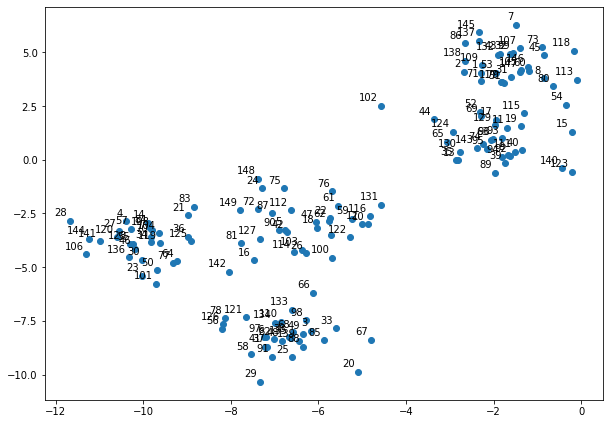

In [5]:
X,y = make_blobs(
    n_samples=150 ,n_features=2,
    centers=5,cluster_std=0.9,
    shuffle=True, random_state=1
)

# np.savetxt("../Dataset/hierarchical_dataset.csv",X,delimiter=",")
labels = range(1, 150)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

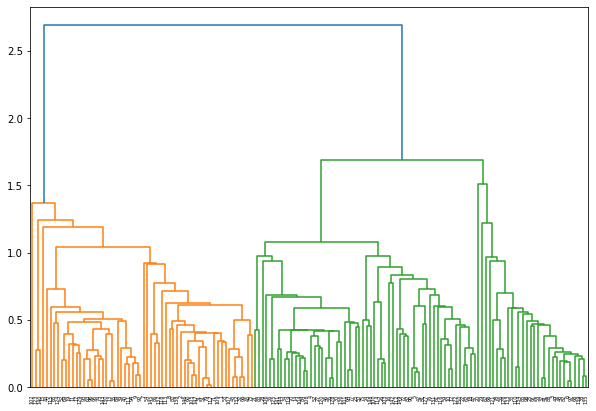

In [75]:
linked = linkage(X,'single',metric='euclid')

labelList = range(1,151)

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts = True)
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred = cluster.fit_predict(X)

- We can see above that a lot of points have been clustered correctly and agglomerative clustering has worked

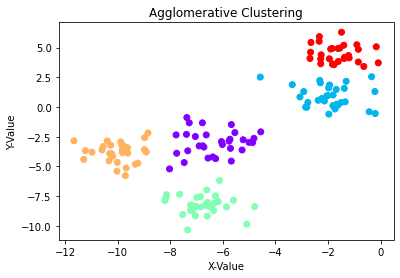

In [8]:
plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap = 'rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("agglo_clust.jpg")
plt.show()

## Analysing Performance (Energy)


### 1. Finding Energy with Clustering

In [9]:
# assuming base station at point B(-6,6)
B = [-6.0,6.0]
B = np.array(B)


In [56]:
# Finding cluster heads
def find_clust_heads(points,preds,num_clusters):
    clust_heads = []
    for i in range(num_clusters):
        min_dist = 1000000000.0
        min_point = []
        for x in points[preds==i]:
            dist = euclidean(x,B)
            # print(dist)
            if dist < min_dist:
                # print(x)
                min_point = x
                min_dist = dist
                # print(min_point)
        clust_heads.append(min_point)
    return clust_heads




In [58]:
clust_heads_res = find_clust_heads(X,y_pred,5)
clust_heads_res = np.array(clust_heads_res)
print(clust_heads_res)

[[-7.37256573 -0.88435367]
 [-4.57842702  2.52011061]
 [-6.12994004 -6.18494642]
 [-8.85133217 -2.18295697]
 [-2.65011717  5.43674121]]


In [61]:
# calculating distances of cluster nodes with cluster heads
def calcdist(heads,points,y_clust):
    # print(heads)
    # print(heads[0])
    num_heads = heads.size // 2
    num_points = points.size //2
    dist = []
    for i in range(num_points):
        y_c = y_clust[i]
        head = heads[y_c]
        # print(head,y_c,points[i])
        dist.append(euclidean(points[i],head))
    return dist


In [62]:
# Calculating Distances from Cluster Heads
node_distances = []
node_distances = calcdist(clust_heads_res,X,y_pred)
node_distances
        


[1.4353233930625764,
 1.3451884350759389,
 1.7767293075053585,
 1.6868433185782765,
 2.459361546337319,
 2.329427089755062,
 1.4459227825192758,
 2.4398363953205933,
 3.69546633685829,
 3.269339709533617,
 3.0699679549331598,
 3.1546588860544107,
 3.0909139114363646,
 1.2818468148623245,
 4.5264169972025,
 3.790397006171589,
 2.7163053683998806,
 2.6414870849287997,
 3.3341248118817366,
 3.8184282210813647,
 0.4223903998406807,
 2.454395517449533,
 3.434124001370029,
 0.45310416488967875,
 3.034252412274298,
 3.630783127217502,
 2.0516945815081917,
 2.8943154226814527,
 4.333183541303107,
 2.7306926285690425,
 1.9092536118118557,
 1.1461521201503704,
 1.7464171785741374,
 1.9244126077200006,
 3.0573651801915873,
 1.409067187375089,
 2.7276322592581033,
 2.1274950357172684,
 3.910077402285055,
 3.8416121526427234,
 2.741220640380308,
 2.5677867322220425,
 0.9467767145187622,
 1.372576125420667,
 1.8924205299590997,
 2.3705876555646865,
 2.4132897797542907,
 2.3456204087492516,
 1.938140

In [63]:
head_distances = []
for i in range(clust_heads_res.size//2):
    dist = euclidean(clust_heads_res[i],B)
    mult = y_pred[y_pred==i].size
    head_distances.append(dist*mult*0.80)

head_distances

[174.09222379638305,
 93.22458183825177,
 292.45534180190697,
 201.0395862070374,
 78.80823661430071]

In [64]:
# Finding Total Energy Required

energy = sum(head_distances)+sum(node_distances)

print("Energy with clustering =",energy)

Energy with clustering = 1193.7047991880213


### 2. Finding Energy Without Clustering


In [66]:
energy_without = 0.0

for point in X:
    energy_without+=euclidean(point,B)
print("Energy without clustering =",energy_without)

Energy without clustering = 1357.0223969027359


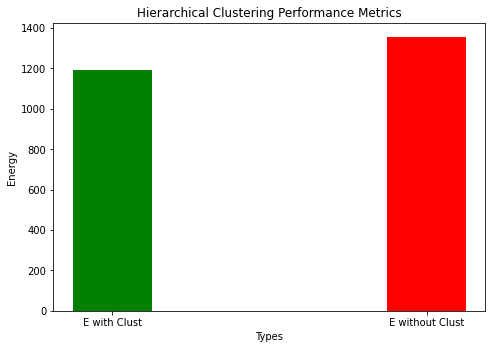

In [74]:
# Plotting the energies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ens = ['E with Clust','E without Clust']
vals = [energy,energy_without]
ax.bar(ens,vals,width=0.25,color=('green','red'))
plt.xlabel("Types")
plt.ylabel("Energy")
plt.title('Hierarchical Clustering Performance Metrics')
plt.savefig("../Performance/wsn_clust_hierarchical_perf.jpg",bbox_inches = "tight")
plt.show()